In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
#展示图片函数
def display_data(X, tile_width=-1, padding=0):
    m, n = X.shape
    if tile_width < 0:
        tile_width = int(np.round(np.sqrt(n)))
    tile_height = n / tile_width
    display_rows = int(np.floor(np.sqrt(m)))
    display_columns = int(np.ceil(m / display_rows))
    tile_height_padded = tile_height + padding * 2
    tile_width_padded = tile_width + padding * 2
    data = np.zeros((int(display_rows * tile_height_padded), int(display_columns * tile_width_padded)))
    for i in range(display_rows):
        for j in range(display_columns):
            tile = format_tile(X[i * int(display_rows) + j,], int(tile_width), padding)
            tile = tile.T
            data[int(i * tile_height_padded):int((i + 1) * tile_height_padded),
                 int(j * tile_width_padded):int((j + 1) * tile_width_padded)] = tile
    plt.imshow(data, cmap='gray', extent=[0, 1, 0, 1])
def format_tile(x, width=-1, padding=0):
    if width < 0:
        width = int(np.round(np.sqrt(len(x))))
    height = len(x) / width
    tile = np.ones((int(height) + int(padding) * 2, int(width) + int(padding) * 2))
    for i in range(int(padding), int(height) + int(padding)):
        tile[i, padding:(padding + width)] = x[((i - padding) * width):((i - padding) * width + width)]
    return tile

In [3]:
#加载数据
mat_data=sio.loadmat('.\machine-learning-exercise-master\coursera-machine-learning-python\ex4\ex4data1.mat')
X=mat_data['X']
y=mat_data['y'].ravel()
m,n=X.shape

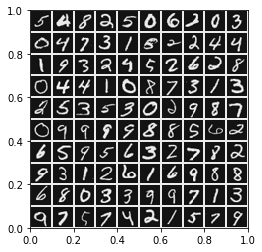

In [4]:

#随机展示图片
rand_indices=np.random.permutation(m)
plt.figure()
display_data(X[rand_indices[0:100],:],padding=1)
plt.show()

In [5]:
#加载参数表
mat_param=sio.loadmat('.\machine-learning-exercise-master\coursera-machine-learning-python\ex4\ex4weights.mat')
theta_1=mat_param['Theta1']
theta_2=mat_param['Theta2']
params_trained=np.hstack((theta_1.flatten(),theta_2.flatten()))

In [6]:
#定义sigmoid函数
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

#定义sigmoid梯度函数
def sigmoid_gradient(z):
    g=sigmoid(z)*(1-sigmoid(z))
    return g

In [7]:
#计算损失函数
def nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, l):
    Theta_1 = np.reshape(nn_params[0:(hidden_layer_size * (input_layer_size + 1)), ],
                         (hidden_layer_size, input_layer_size + 1))
    Theta_2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):, ],
                         (num_labels, hidden_layer_size + 1))
    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))
    Z_2 = X.dot(Theta_1.T)
    A_2 = sigmoid(Z_2)
    A_2 = np.hstack((np.ones((m, 1)), A_2))
    Z_3 = A_2.dot(Theta_2.T)
    A_3 = sigmoid(Z_3)
    Y = np.zeros((m, num_labels))
    for i in range(m):
        Y[i, y[i] - 1] = 1
    j = 0.0
    for i in range(m):
        j += np.log(A_3[i, ]).dot(-Y[i, ].T) - np.log(1 - A_3[i, ]).dot(1 - Y[i, ].T)
    j /= m
    Theta_1_square = np.square(Theta_1[:, 1:])
    Theta_2_square = np.square(Theta_2[:, 1:])
    reg = 1.0 * l / (2 * m) * (np.sum(Theta_1_square) + np.sum(Theta_2_square))
    j += reg
    d_3 = A_3 - Y
    D_2 = d_3.T.dot(A_2)
    Z_2 = np.hstack((np.ones((m, 1)), Z_2))
    d_2 = d_3.dot(Theta_2) * sigmoid_gradient(Z_2)
    d_2 = d_2[:, 1:]
    D_1 = d_2.T.dot(X)
    Theta_1_grad = 1.0 * D_1 / m
    Theta_1_grad[:, 1:] = Theta_1_grad[:, 1:] + 1.0 * l / m * Theta_1[:, 1:]
    Theta_2_grad = 1.0 * D_2 / m
    Theta_2_grad[:, 1:] = Theta_2_grad[:, 1:] + 1.0 * l / m * Theta_2[:, 1:]
    grad = np.hstack((Theta_1_grad.ravel(), Theta_2_grad.ravel()))
    return j, grad

In [8]:
#计算导入参数的损失函数值
l=0.0
input_layer_size=400
hidden_layer_size=25
num_labels=10
j,_=nn_cost_function(params_trained,input_layer_size,hidden_layer_size,num_labels,X,y,l)
print("损失函数值为:",j)


损失函数值为: 0.28762916516131876


In [9]:
l=1.0
j,_=nn_cost_function(params_trained,input_layer_size,hidden_layer_size,num_labels,X,y,l)
print("损失函数值为:",j)

损失函数值为: 0.3837698590909235


In [10]:
#计算sigmoid梯度
g=sigmoid_gradient(np.array([-1,-0.5,0,0.5,1]))
print('sigmoid gradient在[-1,-0.5,0,0.5,1]:')
print(g)

sigmoid gradient在[-1,-0.5,0,0.5,1]:
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]


In [11]:
#定义初始化参数函数
def rand_initialize_weights(l_in,l_out):
    epsilon_init=0.12
    W=np.random.rand(l_out,1+l_in)*2*epsilon_init-epsilon_init
    return W

In [12]:
initial_theta_1=rand_initialize_weights(input_layer_size,hidden_layer_size)
initial_theta_2=rand_initialize_weights(hidden_layer_size,num_labels)
initial_nn_params=np.hstack((initial_theta_1.ravel(),initial_theta_2.ravel()))


In [13]:
l=3.0
debug_j,_=nn_cost_function(params_trained,input_layer_size,hidden_layer_size,num_labels,X,y,l)
print('cost at (fixed) debugging parameters(w/lambda={}):{}'.format(l,debug_j))


cost at (fixed) debugging parameters(w/lambda=3.0):0.5760512469501329


In [14]:
#训练神经网络
import scipy.optimize as opt
result=opt.minimize(fun=nn_cost_function,x0=initial_nn_params,args=(input_layer_size,hidden_layer_size,num_labels,X,y,l),method='TNC',jac=True,options={'maxiter':150})
params_trained=result.x
Theta_1_trained=np.reshape(params_trained[0:(hidden_layer_size*(input_layer_size+1)),],(hidden_layer_size,input_layer_size+1))
Theta_2_trained=np.reshape(params_trained[(hidden_layer_size*(input_layer_size+1)):,],(num_labels,hidden_layer_size+1))

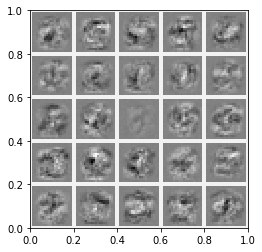

In [15]:
plt.figure()
display_data(Theta_1_trained[:,1:],padding=1)
plt.show()

In [16]:
#预测
def predict(Theta_1,Theta_2,X):
    m,n=X.shape
    X=np.hstack((np.ones((m,1)),X))
    A_2=sigmoid(X.dot(Theta_1.T))
    A_2=np.hstack((np.ones((m,1)),A_2))
    A_3=sigmoid(A_2.dot(Theta_2.T))
    p=np.argmax(A_3,axis=1)
    p+=1
    return p

In [17]:
pred=predict(Theta_1_trained,Theta_2_trained,X)
print("训练集准确率:",np.mean(pred==y)*100)

训练集准确率: 96.1
